In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import math
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats


In [4]:
#Calcular la distribución binomial
def dbinom(w,n,p):
  return np.math.factorial(n)/(np.math.factorial(w)*(np.math.factorial(abs(n-w))))*p**w*(1-p)**(n-w)
#Funciones para hacer el ajuste lineal
def func(x, a, b, c):
     return a * np.exp(-(x - b)**2/ (2*c**2)) #Ajuste tipo exponencial
"""     
def func(x, a, b, c, d, e, f, g, h):
    return a*x**7 + b*x**6 +c*x**5 + d*x**4+e*x**3+g*x**2+h*x**1+f #Ajuste tipo exponencial
def func(x,g,h,f):
    return g*x**2+h*x**1+f #Ajuste tipo exponencial
"""
#Calcular la probalbilidad
def posterior(w,n,p):
  prior=np.zeros(len(p))+1
  likelihood =dbinom( w ,n, p)
  # compute product of likelihood and prior
  unstd_posterior = likelihood * prior
  # standardize the posterior, so it sums to 1
  return  unstd_posterior / sum(unstd_posterior)

In [5]:
Dat=np.array(['W','L','W','W','W','L','W','L','W'])

w=6 # es el evento, en este caso que obtengamos agua
n=len(Dat) # Tamaño del espacio muestral
p=np.linspace(0,0.9991,20) # Proporción de agua

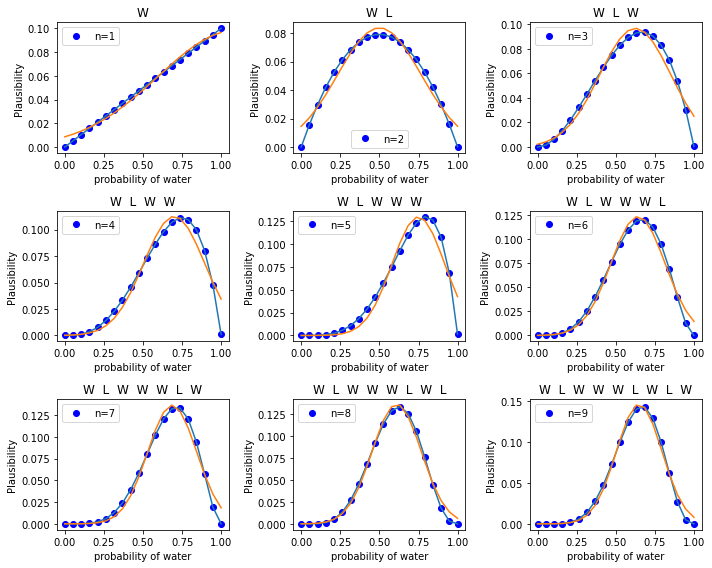

In [6]:
popt, pcov = curve_fit(func, p, posterior(w,n,p))
w=0
#Gráfica de los datos
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=1):
    if str(Dat[i-1])=='W':
      w=w+1
    popt, pcov = curve_fit(func, p, posterior(w,i,p))
    ax.plot( p , posterior(w,i,p) , "bo", label="n="+str(i) )
    ax.plot( p , posterior(w,i,p) , "" )
    ax.plot(p,func(p, *popt))
    ax.set_title("  ".join(Dat))
    ax.set_title("  ".join(Dat[:i]))
    ax.set_xlabel('probability of water')
    ax.set_ylabel('Plausibility')
    ax.legend()
fig.tight_layout()


#Ejemplo

la maquina que detecta el vampirismo 

In [7]:
Pr_pv=0.95 # probabilidad de ser vampido si das positivo
Pr_v=0.001 # probabilidad de ser vampiros
Pr_H=1-Pr_v # probabilidad de ser Humano
Pr_pH=0.01 # probabilidad de dar positivo y ser Humanos
Pr_Positivo=Pr_pv*Pr_v+Pr_pH*Pr_H

likelyhood=Pr_pv
prior=Pr_v
posterior_=likelyhood*prior/Pr_Positivo
print("la probabilidad de tener vampirismo dado que la maquina dio positivo es %.3f "%posterior_)


la probabilidad de tener vampirismo dado que la maquina dio positivo es 0.087 


##Samples

No handles with labels found to put in legend.


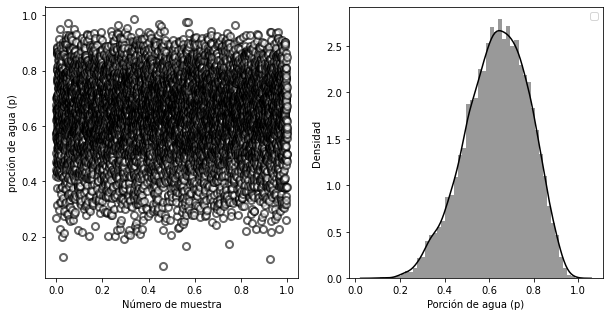

In [8]:
N=int(1e4) #numero de Datos
p_=np.linspace(0,0.999,N) # Proporción de agua
s_=np.random.choice(p_,N,p=posterior(6,9,p_))#muestreo
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(p_,s_,s=50,c='w',edgecolor='k',linewidth=2,alpha=0.6)
plt.ylabel('proción de agua (p)')
plt.xlabel('Número de muestra')
plt.subplot(1,2,2)
sns.distplot(s_,color='k')
plt.xlabel('Porción de agua (p)')
plt.ylabel('Densidad')
plt.legend()


In [9]:
sum(s_[s_<=0.5])/N, sum(s_[ (s_>0.5) & (s_<0.75)])/N, sum( posterior(6,9,p_)[p_< 0.5 ] )


(0.07162486309630976, 0.3786759804680469, 0.17187425758083813)

In [10]:

print(r'el percentiles para una probabilidad del 0.80 es %.2f'%(np.percentile(s_,0.8)))
print(r'el quantiles para una probabilidad del 0.80 es %.2f'%(np.quantile(s_,0.8)))
      


el percentiles para una probabilidad del 0.80 es 0.28
el quantiles para una probabilidad del 0.80 es 0.76


No handles with labels found to put in legend.
No handles with labels found to put in legend.


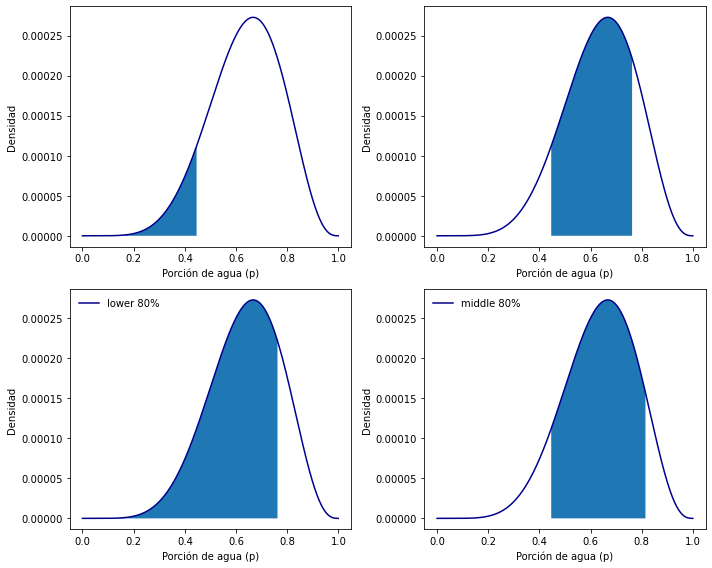

In [11]:
# Porcentajes de probabilidad
x1=np.array([0.0,0.1,0.0,0.1])  
x2=np.array([0.1,0.8,0.8,0.9])
# Valor de los cuantiles
xx_min=np.quantile(s_,x1)
xx_max=np.quantile(s_,x2)
label=np.array(['','','lower 80%','middle 80%'])
#Gráfica
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=0):
    ax.plot(p_,posterior(6,9,p_), color='darkblue', label=label[i])
    ax.fill_between(p_[(p_<=xx_max[i]) & (p_>=xx_min[i])],posterior(6,9,p_)[(p_<=xx_max[i]) & (p_>=xx_min[i])])
    ax.set_xlabel('Porción de agua (p)')
    ax.set_ylabel('Densidad')
    ax.legend(frameon=False)
fig.tight_layout()

In [12]:
for i in range(len(xx_max) ):
    por=sum(posterior(6,9,p_)[(p_<=xx_max[i]) & (p_>=xx_min[i])])
    print('aproximadamente el %.3f de la probabilidad posterior está entre %.2f y %.2f'%(por,xx_min[i],xx_max[i]))

aproximadamente el 0.097 de la probabilidad posterior está entre 0.09 y 0.45
aproximadamente el 0.706 de la probabilidad posterior está entre 0.45 y 0.76
aproximadamente el 0.803 de la probabilidad posterior está entre 0.09 y 0.76
aproximadamente el 0.805 de la probabilidad posterior está entre 0.45 y 0.81


In [13]:
for i in range(len(x2)):
    print("para una probailidad del %.2f El cualtil es %.2f" %( x2[i], np.quantile(s_,x2[i]) ) )

para una probailidad del 0.10 El cualtil es 0.45
para una probailidad del 0.80 El cualtil es 0.76
para una probailidad del 0.80 El cualtil es 0.76
para una probailidad del 0.90 El cualtil es 0.81


In [14]:
np.mean(s_),np.median( s_),stats.mode(s_)

(0.6359174114311432,
 0.6437700270027003,
 ModeResult(mode=array([0.64591809]), count=array([9])))

In [15]:
sum(posterior(6,9,p_)*abs( 0.5-p_ ) )

0.1640625013076208

No handles with labels found to put in legend.


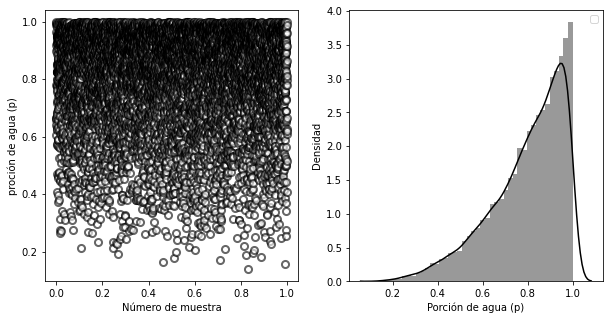

In [16]:
N=int(1e4) #numero de Datos
p_=np.linspace(0,0.999,N) # Proporción de agua
s_=np.random.choice(p_,N,p=posterior(3,3,p_))#muestreo
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(p_,s_,s=50,c='w',edgecolor='k',linewidth=2,alpha=0.6)
plt.ylabel('proción de agua (p)')
plt.xlabel('Número de muestra')
plt.subplot(1,2,2)
sns.distplot(s_,color='k')
plt.xlabel('Porción de agua (p)')
plt.ylabel('Densidad')
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


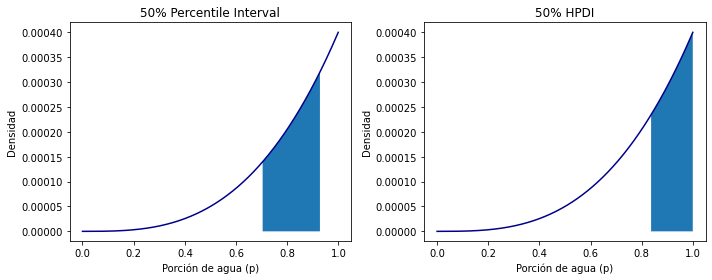

In [17]:
# Porcentajes de probabilidad
x1=np.array([0.25,0.5,0.0,0.1])  
x2=np.array([0.75,0.999,0.8,0.9])
# Valor de los cuantiles
xx_min=np.quantile(s_,x1)
xx_max=np.quantile(s_,x2)
label=np.array(['','','lower 80%','middle 80%'])
#Gráfica
Title=np.array(['50% Percentile Interval','50% HPDI'])
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
for i, ax in enumerate(axes.flat, start=0):
    ax.plot(p_,posterior(3,3,p_), color='darkblue', label=label[i])
    ax.fill_between(p_[(p_<=xx_max[i]) & (p_>=xx_min[i])],posterior(3,3,p_)[(p_<=xx_max[i]) & (p_>=xx_min[i])])
    ax.set_xlabel('Porción de agua (p)')
    ax.set_ylabel('Densidad')
    ax.set_title(Title[i])
    ax.legend(frameon=False)
fig.tight_layout()

In [18]:
np.percentile(posterior(3,3,p_),0.25),np.percentile(posterior(3,3,p_),0.75)

(6.24944882727097e-12, 1.687337920710763e-10)

#{Estimaciones puntuales}

In [19]:
Stad=np.array([np.mean(s_),np.median(s_),stats.mode(s_)[0]])
Stad_n=np.array(['Media','Mediana','Moda'])
Col=np.array(['k','b','r'])
sum(posterior(3,3,p_)*abs( 0.5 - p_))

d=np.linspace(0,1,100)
loss=np.zeros(len(d))
for i in range(len(d)):
    loss[i] =sum( posterior(3,3,p_)*abs( d[i] - p_ ) ) 
    

No handles with labels found to put in legend.


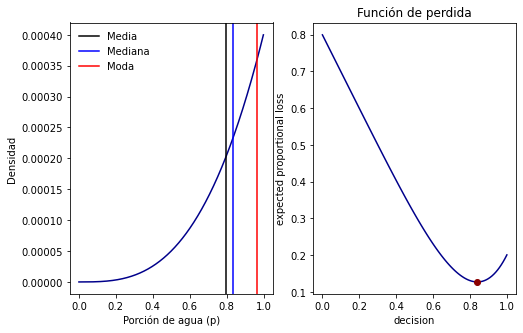

In [20]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(p_,posterior(3,3,p_), color='darkblue', label=label[0])
for i in range(len(Stad)):
    plt.axvline(Stad[i], ymin=0.0, ymax=1.9, label=Stad_n[i],color=Col[i])
plt.xlabel('Porción de agua (p)')
plt.ylabel('Densidad')
plt.legend(frameon=False)
fig.tight_layout()
plt.subplot(1,2,2)
plt.plot(d,loss, color='darkblue')
plt.plot(d[np.where(loss == min(loss))[0]][0],min(loss), color='darkred',marker="o")
plt.xlabel('decision')
plt.ylabel('expected proportional loss')
plt.title('Función de perdida')
plt.legend(frameon=False)
fig.tight_layout()

In [21]:
# muestreo de Predicciones

In [22]:
x=np.arange(0,10,1)

c=np.zeros(len(x))
dd=c
y=np.random.choice(x,N,p=dbinom(x,9,0.7))
for i in range(len(x)):
    count=0.0
    for j in range(len(y)):
        if y[j]==i:
            count=count+1
        c[i]=count
plt.stem(x, c)   

TypeError: only integer scalar arrays can be converted to a scalar index

In [23]:
for i in range(len(x)):
    dd[i]=dbinom(x[i],9,0.7)
    print(dbinom(x[i],9,0.7))
dd

1.9683000000000025e-05
0.0004133430000000004
0.0038578680000000034
0.021003948000000015
0.07351381800000004
0.17153224200000003
0.26682793200000005
0.266827932
0.15564962699999996
0.04035360699999998


array([1.96830000e-05, 4.13343000e-04, 3.85786800e-03, 2.10039480e-02,
       7.35138180e-02, 1.71532242e-01, 2.66827932e-01, 2.66827932e-01,
       1.55649627e-01, 4.03536070e-02])

In [26]:
plt.plot(x,dbinom(x,9,0.7))

TypeError: only integer scalar arrays can be converted to a scalar index

In [36]:
p

array([0.        , 0.05258421, 0.10516842, 0.15775263, 0.21033684,
       0.26292105, 0.31550526, 0.36808947, 0.42067368, 0.47325789,
       0.52584211, 0.57842632, 0.63101053, 0.68359474, 0.73617895,
       0.78876316, 0.84134737, 0.89393158, 0.94651579, 0.9991    ])